__CRA Lecture: Choosing Nicer Color Palettes in Python__ 

`Notebook created by`: Mubashshir Ali

Notebook shows How to Choose nicer Colorpalettes provided by [colorbrewer tool](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) and requires a live kernel to display interactive widgets.

We're using `seaborn` module. It provides easier way to implement nicer color bars. 

However, if you want other color bar options from the colorbrewer tool then check out `palettable` [module](https://jiffyclub.github.io/palettable/#matplotlib-colormap) which implements it in Python. (Contact Hélène for any questions on palettable)

# Imports

In [1]:
import seaborn as sns
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

# File loading

In [2]:
# file has temperature
file1 = '/scratch3/climriskdata/EUR-11/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/tas/tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-19751231_LL.nc'
ds1 = xr.open_dataset(file1)

# wind data
file2 = '/scratch3/climriskdata/EUR-11/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/sfcWind/sfcWind_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-19751231_LL.nc'
ds2 = xr.open_dataset(file2)

# future projections
# future projections with RCP8.5
#file2 = '/scratch3/climriskdata/EUR-11/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/rcp85/sfcWind/sfcWind_EUR-11_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_MPI-CSC-REMO2009_v1_day_20710101-20751231_LL.nc'


# Colorbars

Thanks to the developers of `seaborn` for creating this awesome, easy to use widget to choose colorbars.

__Note__: Its a live widget and needs a `live` jupyter notebook to run

## Sequential

In [3]:
sns.choose_colorbrewer_palette('sequential');

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

## Diverging

In [6]:
sns.choose_colorbrewer_palette('diverging');

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

# Choosing colorbars

In [9]:
sns.choose_colorbrewer_palette('sequential')
# note the missing semi-colon at the end . It will give show the list of colours as [(R,G,B)...] values

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

----------------
`Seaborn` has an in-built option `as_cmap` to convert this list to matplotlib colorbar.

__Important techincal note:__  `Matplotlib Listed colormap` maps the range between the minimum and maximum value to the colormap, such that the first and last color are definitely in the plot, but when we just give list of colors, they will get picked up as it is. 

Hence, to avoid missing the most contrasting color bars it is recomended to convert list of RGB values into `matplotlib Listed colormap` either by using as_cmap=True or by calling the function `matplotlib.ListedColormap`

In [10]:
cmap1 = sns.choose_colorbrewer_palette('sequential', as_cmap=True) 
# you can check what happens when you turn as_cmap=False

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

`cmap1` is our __live__ colormap. It can be changed interactively using widget. Let's test it!

------------------
Interact with the colorbar widget and run the cell below to see what I mean by __live__. 

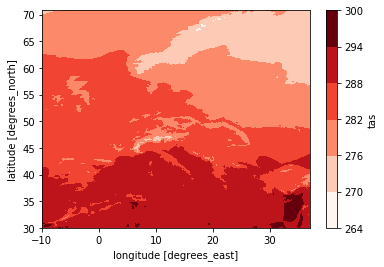

In [12]:
ds1.tas.mean(dim='time').squeeze().plot.contourf(cmap=cmap1);
# squeeze command to remove any extra dimensions as contourf will only work if your data-array is 2-D

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


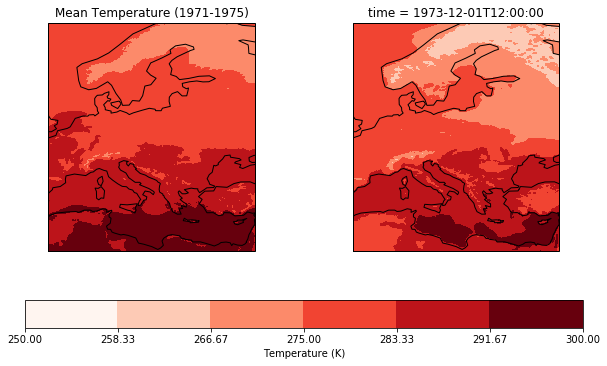

In [13]:
## quick subplot and save it
projection=ccrs.PlateCarree() #declaring projection
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,6), subplot_kw=dict(projection=projection))

ds1.tas.mean(dim='time').squeeze().plot.contourf(ax=ax1,cmap=cmap1, vmin=250, vmax=300 ,add_colorbar=False)
p = ds1.tas.sel(time='1973-12-01 12:00').squeeze().plot.contourf(ax=ax2,cmap=cmap1, vmin=250, vmax=300, add_colorbar=False)
# Note: we didn't specify projection of our data while plotting because its already in PlateCarree, same as our axis.
ax1.set_title('Mean Temperature (1971-1975)')

for ax in [ax1,ax2]:
    ax.coastlines()
    ax.set_extent([0,36, 30, 69])
# common color bar for both the plots
## make sure to specify both the axis
fig.colorbar(p, ax=[ax1,ax2], label='Temperature (K)' ,fraction=0.15, orientation='horizontal');
plt.savefig('/home/mali/CRA_tutorials/test_subplot.png') # saving the plot

With a bit more effort we can plot live plots as well. But its beyond this course

## Qualitative colorbars

__Note__:`as_cmap` option doesn't work for qualitative colorbars.

In [2]:
cmap2 = sns.choose_colorbrewer_palette('qualitative', as_cmap=True)

ValueError: Qualitative palettes cannot be colormaps.

`Seaborn` doesn't let us convert Qualitative colormaps directly into `ListedColormap`

-------
Let's work around the error

In [16]:
cmap2 # its a list of RGB values


[(0.6509803921568625, 0.8078431372549018, 0.8901960784313726),
 (0.12156862745098052, 0.4705882352941175, 0.7058823529411764),
 (0.6980392156862745, 0.8745098039215685, 0.5411764705882353),
 (0.20000000000000012, 0.6274509803921569, 0.1725490196078432),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372546, 0.1098039215686274),
 (0.992156862745098, 0.7490196078431373, 0.43529411764705894),
 (1.0, 0.4980392156862745, 0.0),
 (0.7921568627450978, 0.6980392156862745, 0.8392156862745097)]

In [17]:
cmap3 = matplotlib.colors.ListedColormap(cmap2) # converts the list into a colorbar
# In this is how you can create any custom colorbar

cmap3 # print the color bar

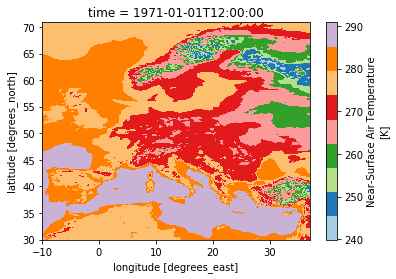

In [20]:
# quick plot
ds1.tas.sel(time='1971-01-01').plot(cmap=cmap3);

## combining colorbars

Sometimes, we wish to only highlight higher values in our data. We can either try to choose pre-defined colorbar, if you can find a nice one. Or lets try to create our own colorbar by combining pre-defined nicer colorbars

In [21]:
cmap4 = sns.choose_colorbrewer_palette('sequential')
#select greys

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

In [22]:
cmap5 = sns.choose_colorbrewer_palette('sequential')

# select Reds

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

In [24]:
## adding 4 and 5
## we didn't convert to cmap before because we need them as list to add the colors
cmap6 = matplotlib.colors.ListedColormap(cmap4 + cmap5)

Lets plot Wind data and catch viewers attention to higher wind values

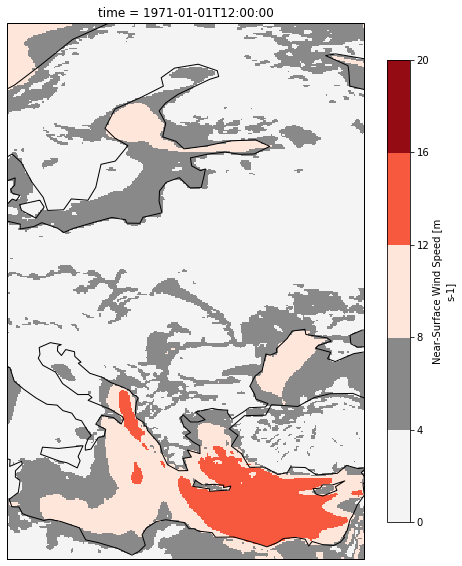

In [25]:
projection=ccrs.PlateCarree()
fig = plt.figure(figsize=(8,10))
ax = plt.axes(projection=projection)

#ax.add_feature(cfeature.COASTLINE, linestyle='-')
#ax.add_feature(cfeature.BORDERS, linestyle=':')



p = ds2.sfcWind.sel(time='1971-01-01T12:00:00').plot.pcolormesh(ax=ax, cmap=cmap6, transform=projection, levels=6, cbar_kwargs={'shrink':0.85})
ax.coastlines()
ax.set_extent([ 10,36, 30, 69]) # change to zoom in
# while zooming in, colorbar may become larger than your map
# in that case tweak the shrink parameter.

To do: quiver for wind

In [4]:
data = ds2.sfcWind.sel(time='1971-01-01T12:00:00')

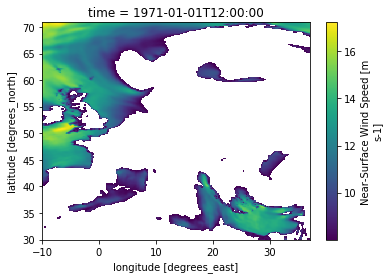

In [6]:
data.where(data > 8).plot();

# Extras

[Creating colorbars in Matplotlib](https://matplotlib.org/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)
Matplotlib has ultimate guide to create colorbars. They dive into more technical stuff. For those who want to dig deep, feel free to check it out. However, using `Seaborn` interface is much easier and is recommended.

__Side note:__ If you don't want to use the graphical interface to choose color bars then you can create a color bar as an example,

`cmap_custom = matplotlib.colors.ListedColormap(sns.color_palette(palette='Reds', n_colors=14))`



# General Tips

Adjust your colorbar according to the data you have and what you want to emphasize.

Stick with the standard types as shown in the lecture and thats good enough.

Please do a favour and don't use jet/rainbow at all.

Use levels and create custom levels if you want to highlight specific values. 

Arrows, shapes, etc or some easy editing can also be done on the plots using image editing functions in Word/Powerpoint/Photoshop/Gimp.